In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
ds = pd.read_csv("adult.csv")
ds.replace('?', np.nan, inplace=True)
ds.dropna(inplace=True)

In [4]:
x=ds.iloc[:,:-1].values
y=ds.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
x_train[:, 1:]=imputer.fit_transform(x_train[:,1:]) 

In [7]:
from sklearn.preprocessing import LabelEncoder

ordinal_categorical_columns = [1, 3, 5, 6, 7, 8, 9, 13]

label_encoders = []
for col_index in ordinal_categorical_columns:
    le = LabelEncoder()
    x_train[:, col_index] = le.fit_transform(x_train[:, col_index])
    x_test[:, col_index] = le.transform(x_test[:, col_index])
    label_encoders.append(le)


In [8]:
from sklearn.preprocessing import LabelEncoder
lb_obj= LabelEncoder() 
y_train=lb_obj.fit_transform(y_train)
y_test=lb_obj.transform(y_test)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # or StandardScaler
x_train_StandardScaled = scaler.fit_transform(x_train)
x_test_StandardScaled = scaler.transform(x_test)


In [10]:
from sklearn.svm import SVC
classifier= SVC(C=1,kernel='linear',random_state=0)
classifier.fit(x_train_StandardScaled,y_train)

SVC(C=1, kernel='linear', random_state=0)

In [11]:
print(classifier.predict(scaler.transform([[0.177807, 0.088108,0.173244,1.218035,-0.036491,-0.407250,1.289114,-0.898177,0.394225,0.698654,-0.144749,-0.21852,0.851632,0.292299]])))

[0]


In [12]:
y_pred = classifier.predict(x_test_StandardScaled)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8121995690369633

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


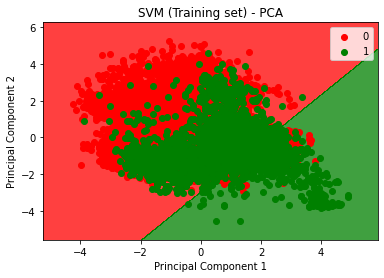

In [14]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Reduce dimensionality to 2 components using PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_StandardScaled)

# Train SVM on reduced dataset
svm_model = SVC(kernel='linear', random_state=0)  # Linear kernel for simplicity
svm_model.fit(x_train_pca, y_train)

# Creating a meshgrid for visualization
x1_min, x1_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
x2_min, x2_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
X_grid = np.array([x1.ravel(), x2.ravel()]).T

# Predicting on the meshgrid data
y_pred_grid = svm_model.predict(X_grid)
y_pred_grid = y_pred_grid.reshape(x1.shape)

# Plotting the decision boundary
plt.contourf(x1, x2, y_pred_grid, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plotting the training set points
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(x_train_pca[y_train == j, 0], x_train_pca[y_train == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('SVM (Training set) - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


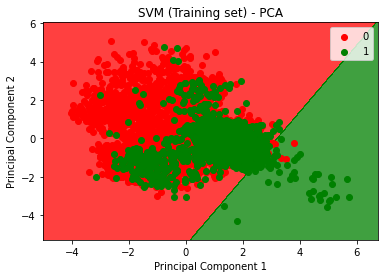

In [15]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Reduce dimensionality to 2 components using PCA
pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(x_test_StandardScaled)

# Train SVM on reduced dataset
svm_model = SVC(kernel='linear', random_state=0)  # Linear kernel for simplicity
svm_model.fit(x_test_pca, y_test)

# Creating a meshgrid for visualization
x1_min, x1_max = x_test_pca[:, 0].min() - 1, x_test_pca[:, 0].max() + 1
x2_min, x2_max = x_test_pca[:, 1].min() - 1, x_test_pca[:, 1].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
X_grid = np.array([x1.ravel(), x2.ravel()]).T

# Predicting on the meshgrid data
y_pred_grid = svm_model.predict(X_grid)
y_pred_grid = y_pred_grid.reshape(x1.shape)

# Plotting the decision boundary
plt.contourf(x1, x2, y_pred_grid, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plotting the training set points
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(x_test_pca[y_test == j, 0], x_test_pca[y_test == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('SVM (Training set) - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameters grid for grid search
param_grid = {
    'C': [1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create SVM model
svm_model = SVC(random_state=0)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_StandardScaled, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)


Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Accuracy Score: 0.8439220113847918


In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [1], 
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Initialize the SVM model
svm_model = SVC()

# Perform GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(x_train_StandardScaled, y_train)

# Get the best parameters for SVM
best_params_svm = grid_search_svm.best_params_
best_accuracy_svm = grid_search_svm.best_score_

print("Best Parameters for SVM:", best_params_svm)
print("Best Accuracy for SVM:", best_accuracy_svm)


Best Parameters for SVM: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Accuracy for SVM: 0.8442535746571357


In [18]:
from sklearn.svm import SVC

# SVM Classifier with the best parameters
best_svm = SVC(C=1, gamma=0.1, kernel='rbf')  # Replace with the best parameters obtained

# Fit the classifier with the training data
best_svm.fit(x_train_StandardScaled, y_train)


SVC(C=1, gamma=0.1)

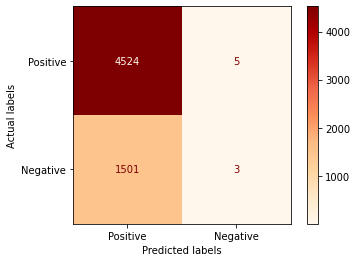

Accuracy: 0.7503729487817007
Recall: 0.0019946808510638296
Precision: 0.375
F1-score: 0.003968253968253968
AUC: 0.5770605682997985


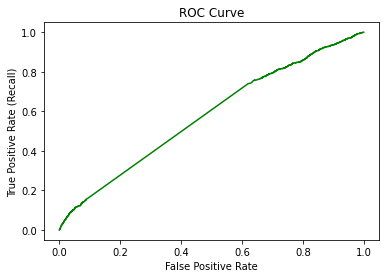

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create and fit the SVM Classifier
svm_classifier = SVC(C=1, gamma=0.1, kernel='rbf')  # Replace with your best parameters obtained
svm_classifier.fit(x_train, y_train)

# Predict on the test set using the SVM model
y_pred = svm_classifier.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])  # Replace with your class labels
disp.plot(cmap=plt.cm.OrRd)
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

# Calculate and print the performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))  # By default, pos_label=1 for binary classification
print("Precision:", precision_score(y_test, y_pred))  # By default, pos_label=1 for binary classification
print("F1-score:", f1_score(y_test, y_pred))  # By default, pos_label=1 for binary classification

# Plotting the ROC curve and calculating the AUC
y_pred_prob = svm_classifier.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # Adjust as per your SVM classifier
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, color='green')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.show()


In [21]:
# Confirming the results from the confusion matrix
accuracy=(4524+3)/(4524+3+5+1501)
recall= (3)/(3+1501)
precision = (3)/(3+5)
print("Accuracy : ", accuracy )
print("Recall : ",recall)
print("Precision: ", precision)
print("F1-score: ", 2*(precision*recall/(precision+recall)))

Accuracy :  0.7503729487817007
Recall :  0.0019946808510638296
Precision:  0.375
F1-score:  0.003968253968253968
